#### MSSV: 20110342 _ Nguyễn Thanh Trúc (Lab 05)
 
### BT1: Viết hàm biến hình màu thành trắng đen theo thuật toán,
* input: hình màu
* output: hình trắng đen

### BT2: Viết hàm tính các kênh màu 1 ảnh
* input: 1 ảnh màu
* output: 3 ảnh gồm 3 màu cơ bản (red.png, green.png, blue.png)

### BT3: Đọc nội dung chương 5, sau đó vẽ các hình sau:
* Tam giác vuông, có 2 cạnh vuông góc lần lượt là 20 và 30 pixel => hình màu vàng bên trong tam giác
* Tam giác đều có các cạnh dài 25 pixel => hình màu đỏ trong tam giác
- Hình vuông có cạnh 40 pixel => hình màu xám bên trong
- Hình bình hành có 2 cạnh là 20 pixel và 40 pixel => hình màu xanh lá

### BT4: Đọc và thực hiện chương 6
sau đó viết các hàm thực hiện công việc tương tự chương 6, sau đó so sánh kết quả với hàm tương tự chương 6.


### BT1: Viết hàm biến hình màu thành trắng đen theo thuật toán,
* input: hình màu
* output: hình trắng đen

In [9]:
import numpy as np
import cv2
import pandas as pd
import math as mb
import matplotlib.pyplot as plt

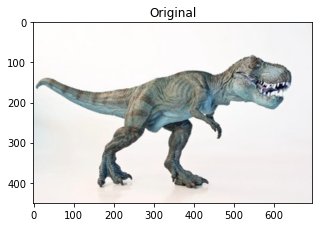

In [10]:
path = "D:/1111111111111111/302843992_485786496928626_6191234182030738228_n.png"
image = cv2.imread(path)
plt.figure( figsize=(5,5))
plt.title('Original')
plt.imshow(image)

In [4]:
def imshows(ImageData, LabelData, rows,cols,gridType = False):
    """
    Show images
        Parameters
        ----------
        ImageData: list images (type list)
        LabelData: list labels (type list)
        rows: int
        cols: int
    """
    #Convert ImageData and LabelData to List
    from matplotlib import pyplot as plt
    ImageArray = list(ImageData)
    LabelArray = list(LabelData)
    if (rows == 1 & cols == 1):
        fig = plt.figure(figsize=(10,10))
    else:
        fig = plt.figure(figsize=(cols*15,rows*10))
    for i in range(1, cols * rows + 1):
        plt.subplot(rows, cols, i)
        image = ImageArray[i-1]
        # if the ....
        # ohterwise, 
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
            plt.grid(gridType)
        else:
            plt.imshow(image)
            plt.grid(gridType)
        plt.title(LabelArray[i-1],fontsize=40)
        plt.axis("off")
    plt.show()


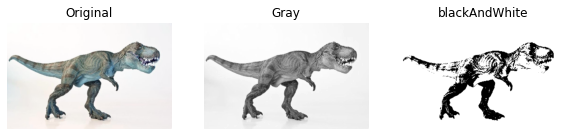

In [70]:
path = "D:/1111111111111111/302843992_485786496928626_6191234182030738228_n.png"
originalImage  = cv2.imread(path)
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
  
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
 
imshows([originalImage, grayImage, blackAndWhiteImage], ["Original", "Gray", "blackAndWhite"], 1,3)
  

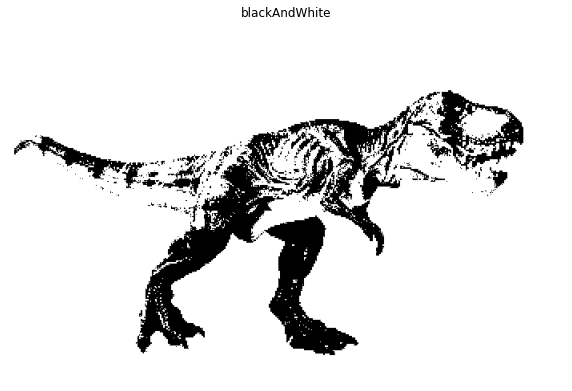

In [68]:
imshows([blackAndWhiteImage], ["blackAndWhite"], 1, 1)

### Bai 2

In [75]:
path = "D:/1111111111111111/302843992_485786496928626_6191234182030738228_n.png"
image = cv2.imread(path)
print(image.shape[0])

451


In [82]:
def cal_color_channels(image):
    image = image.copy()
    red = np.zeros((image.shape[0], image.shape[1], 3),dtype=np.uint8)
    green = np.zeros((image.shape[0], image.shape[1], 3),dtype=np.uint8)
    blue = np.zeros((image.shape[0], image.shape[1], 3),dtype=np.uint8)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            red_ch= image[x,y,0]
            green_ch= image[x,y,1]
            blue_ch= image[x,y,2]
            if red_ch< 195 and green_ch< 195 and blue_ch< 195:
                red[x,y,0] = red_ch
                green[x,y,1] = green_ch
                blue[x,y,2] = blue_ch
    return red,green,blue

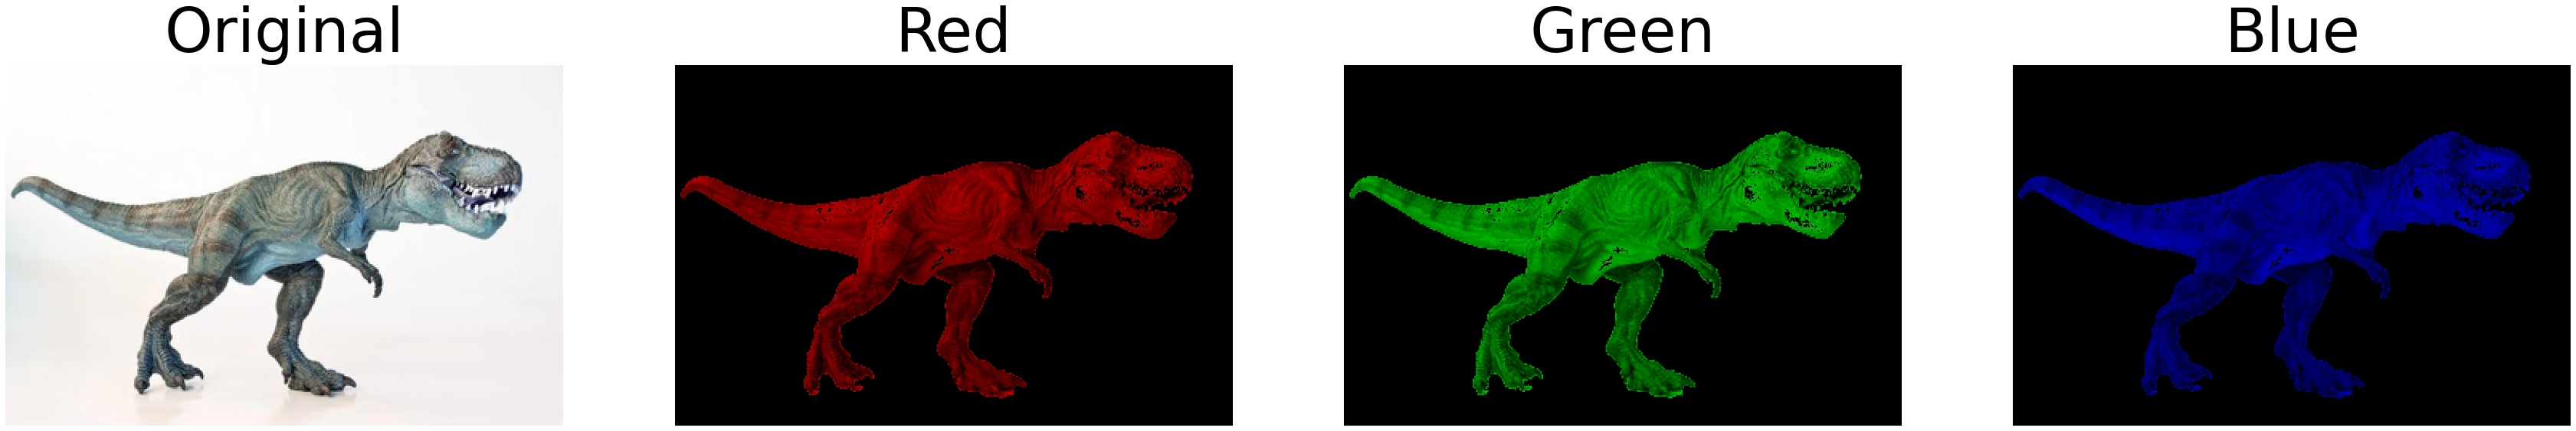

In [104]:
path = "D:/1111111111111111/302843992_485786496928626_6191234182030738228_n.png"
image = cv2.imread(path)
red, green, blue = cal_color_channels(image)

imshows([image,red,green,blue], ["Original", "Red", "Green", "Blue"],1,4)

### Bai 3

In [6]:
import numpy as np
import cv2
import pandas as pd
import math as mb
import matplotlib.pyplot as plt

In [7]:
canvas = np.zeros((200,200,3),dtype=np.uint8)

In [59]:
def show_canvas(canvas):
    plt.figure()
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

In [60]:
def in_polygon(x, y, polygon):
    # kiem tra cac diem xy ben trong hinh da giac
    result = False
    a = len(polygon)
    for i in range a:
        j = (i+1)% a
        if (polygon[i][1] > y) != (polygon[j][1] > y) and \
            x < (polygon[j][0] - polygon[i][0]) * (y - polygon[i][1]) / (polygon[j][1] - polygon[i][1]) + polygon[i][0]:
            result = not result
    return result

    # ve hinh da giac
def draw(canvas,polygon,color,label_x=0,label_y=0):
    canvas = canvas.copy()
    polygon = np.array(polygon)
    polygon[:,0] += label_x
    polygon[:,1] += label_y
    
    
    for i in range(canvas.shape[0]):
        for j in range(canvas.shape[1]): # kiem tra cac diem trong hinh da giac
            if in_polygon(j,i,polygon):
                canvas[i,j] = color
            
    return canvas

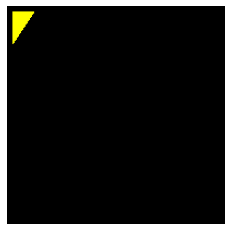

In [61]:
# ve hinh tam giác vuông voi 20,30 px mau vang
triangle = [(0,0),(20,0),(0,30)]
canvas = draw(canvas,triangle,(255,255,0),label_x=5,label_y=5)
show_canvas(canvas)

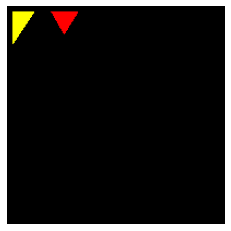

In [62]:
# ve hinh tam giac deu voi 25 pixel mau do
triangle = [(0,0),(25,0),(12,21)]
canvas = draw(canvas,triangle,(255,0,0),label_x=40,label_y=5)
show_canvas(canvas)

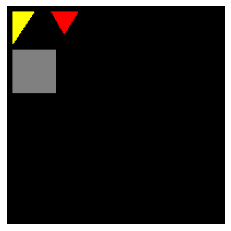

In [63]:
# ve hình vuông có cạnh 40 pixel va co mau xam
square = [(0,0),(40,0),(40,40),(0,40)]
canvas = draw(canvas,square,(128,128,128),label_x=5,label_y=40)
show_canvas(canvas)

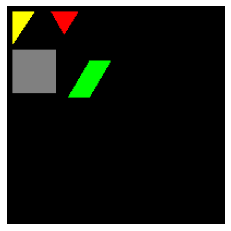

In [64]:
# ve hinh bình bình hành có 2 cạnh là 20 pixel và 40 pixel, màu xanh lá
parallelogram = [(0,0),(20,0),(0,34),(-20,34)]
canvas = draw(canvas,parallelogram,(0,255,0),label_x=75,label_y=50)
show_canvas(canvas)

### Bai 4

#### 6.2 IMUTILS

In [13]:
import numpy as np
import cv2
import imutils

In [14]:
def translate(image,x,y):
    M = np.float32([[1, 0, 25], [0, 1, 50]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted

In [15]:
shifted = imutils.translate(image, 0, 100)
cv2.imshow("Shifted Down", shifted)
cv2.waitKey(0)

-1

In [16]:
def shift_image(image, dx, dy):
    image = np.roll(image, dy, axis=0)
    image = np.roll(image, dx, axis=1)
    if dy>0:
        image[:dy, :] = 0
    elif dy<0:
        image[dy:, :] = 0
    if dx>0:
        image[:, :dx] = 0
    elif dx<0:
        image[:, dx:] = 0
    return image

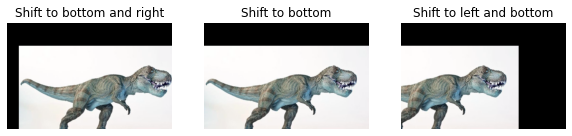

In [28]:
imshows([shift_image(image, 50, 100),shift_image(image, 0, 100),shift_image(image,-200, 100)],["Shift to bottom and right","Shift to bottom","Shift to left and bottom"],1,3,gridType = False)

#### 6.4 ROTATE

In [39]:
import numpy as np
import argparse
import cv2
import math as mb
import matplotlib.pyplot as plt

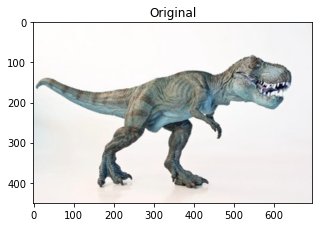

In [40]:
path = "D:/1111111111111111/302843992_485786496928626_6191234182030738228_n.png"
image = cv2.imread(path)
plt.figure( figsize=(5,5))
plt.title('Original')
plt.imshow(image)

In [41]:
(h, w) = image.shape[:2]
center= (w//2,h//2)

In [42]:
def warpAffine(src, M, dsize, from_bounding_box_only=False):
    return cv2.warpAffine(src, M, dsize)

In [43]:
def rotate_image(image, angle):
    # viết chiều, center
    (h, w) = image.shape[:2]
    (col_X, col_Y) = (w // 2, h // 2)

    # sử dụng ma trận xoay
    M = cv2.getRotationMatrix2D((col_X, col_Y), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    #tạo kích thước mới
    new_Width = int((h * sin) + (w * cos))
    new_Heigh = int((h * cos) + (w * sin))

    M[0, 2] += (new_Width / 2) - col_X
    M[1, 2] += (new_Heigh / 2) - col_Y

    image = warpAffine(image, M, (new_Width, new_Heigh), False)

    return image

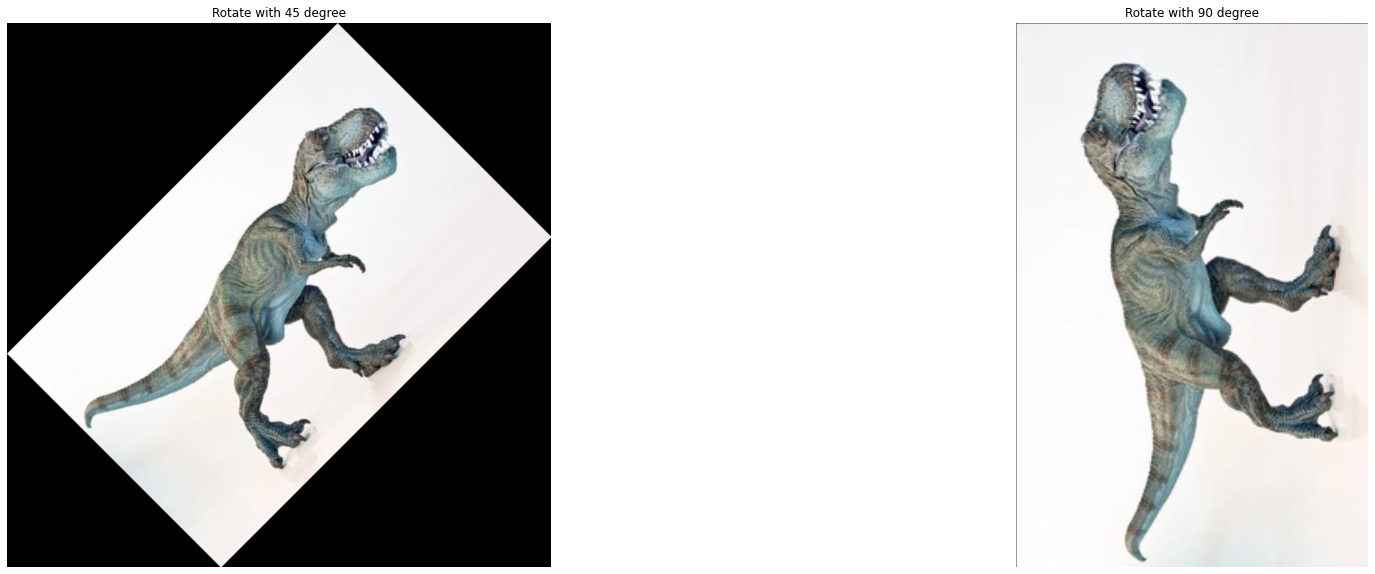

In [44]:
imshows([rotate_image(image, 45),rotate_image(image, 90)],["Rotate with 45 degree","Rotate with 90 degree"],1,2,gridType = False)

#### 6.7 RESIZE

In [68]:
import numpy as np
import argparse
import cv2
import math as mb
import matplotlib.pyplot as plt

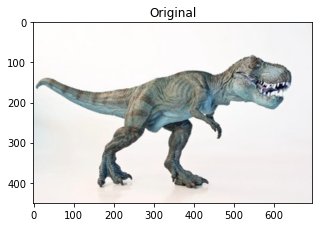

In [69]:
path = "D:/1111111111111111/302843992_485786496928626_6191234182030738228_n.png"
image = cv2.imread(path)
plt.figure( figsize=(5,5))
plt.title('Original')
plt.imshow(image)

In [70]:
resized = imutils.resize(image, width=80)
cv2.imshow("Resized (Height)", resized)
cv2.waitKey(0)

-1

In [117]:
def resize(image, width,height):
    w, h = image.shape[:2]; 
    xNew = int(w * 1 / width)
    yNew = int(h * 1 / height) 
    xScale = xNew/(w-1) 
    yScale = yNew/(h-1) 
    new_Image = np.zeros([xNew, yNew, 3], dtype =np.uint8)
    for i in range(xNew-1): 
        for j in range(yNew-1): 
            new_Image[i + 1, j + 1]= image[1 + int(i / xScale), 1 + int(j / yScale)] 
    return new_Image

In [118]:
image.shape[0]/2,image.shape[1]/2

(225.5, 348.5)

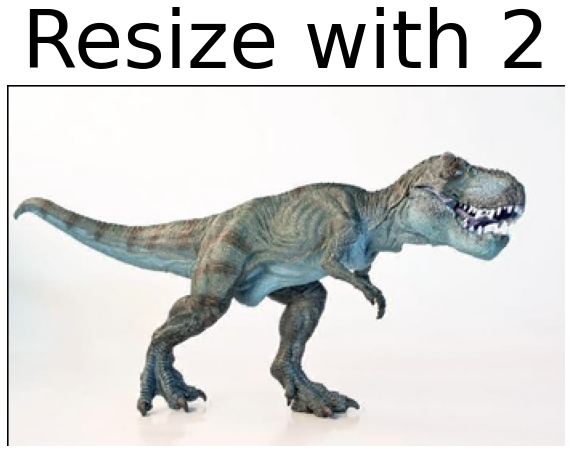

In [119]:
imshows([resize(image,2,2)],["Resize with 2"],1,1)

In [113]:
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))
dim

(150, 97)

#### 6.12 Flipping

In [45]:
import numpy as np
import argparse
import cv2
import math as mb
import matplotlib.pyplot as plt

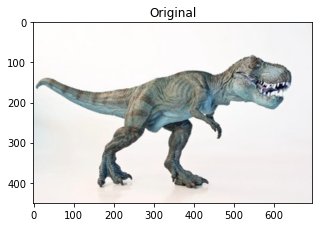

In [46]:
path = "D:/1111111111111111/302843992_485786496928626_6191234182030738228_n.png"
image = cv2.imread(path)
plt.figure( figsize=(5,5))
plt.title('Original')
plt.imshow(image)

In [48]:
def flipping(image,flipping):
    if flipping >= 1:
        horizontal_flipping = image[:, ::-1]
        return horizontal_flipping
    elif flipping == 0: 
        vertical_flipping= image[::-1]
        return vertical_flipping
    else:
        horizontal_flipping = image[:, ::-1]
        vertical_flipping = horizontal_flipping[::-1]
        return vertical_flipping

In [49]:
cv2.imshow("Flipped Horizontally",flipping(image,0))
cv2.waitKey(0)

-1

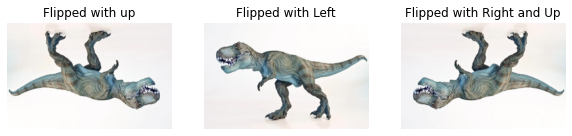

In [50]:
imshows([flipping(image,0),flipping(image,1),flipping(image,-1)],["Flipped with up","Flipped with Left","Flipped with Right and Up"],1,3,gridType = False)

#### Crop image

In [12]:
import numpy as np
import argparse
import cv2
import math as mb
import matplotlib.pyplot as plt

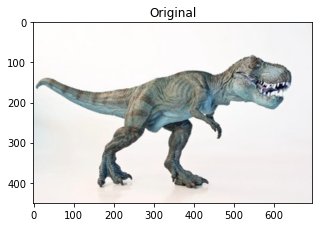

In [13]:
path = "D:/1111111111111111/302843992_485786496928626_6191234182030738228_n.png"
image = cv2.imread(path)
plt.figure( figsize=(5,5))
plt.title('Original')
plt.imshow(image)

In [14]:
def Crop(image, x,y,height,width):
    crop_img = image[y:y+height, x:x+width]
    return crop_img

In [ ]:
crop = image[100:200, 300:400]
cv2.imshow("T-Rex Face", crop)
cv2.waitKey(0)

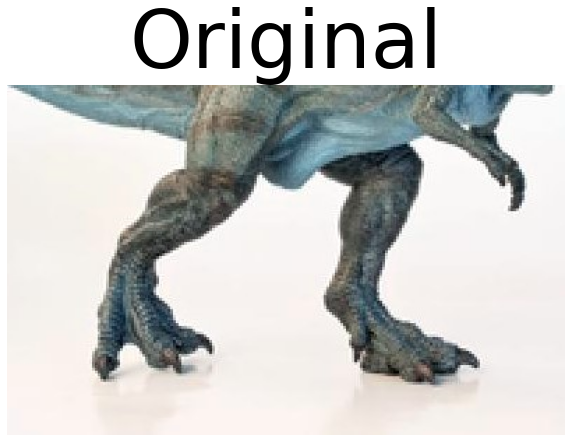

In [17]:
imshows([Crop(image,100,200,300,400)], ["Cropped"], 1,1)

#### 6.22 Splitting and Merging

In [1]:
import numpy as np
import argparse
import cv2
import math as mb
import matplotlib.pyplot as plt

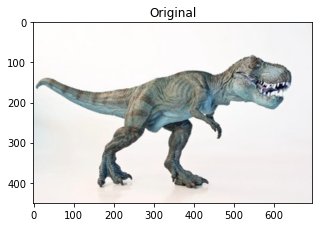

In [2]:
path = "D:/1111111111111111/302843992_485786496928626_6191234182030738228_n.png"
image = cv2.imread(path)
plt.figure( figsize=(5,5))
plt.title('Original')
plt.imshow(image)

In [16]:
(B, G, R) = cv2.split(image)
cv2.imshow("Red", R)
cv2.imshow("Green", G)
cv2.imshow("Blue", B)
cv2.waitKey(0)

-1

In [3]:
def splitting_channels(image):
    return image[:,:,0],image[:,:,1],image[:,:,2]

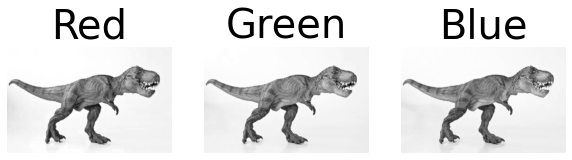

In [10]:
imshows(splitting_channels(image),["Red","Green","Blue"],1,3,gridType = False)

#### 6.18 Bitwise

In [18]:
import numpy as np
import argparse
import cv2
import math as mb
import matplotlib.pyplot as plt

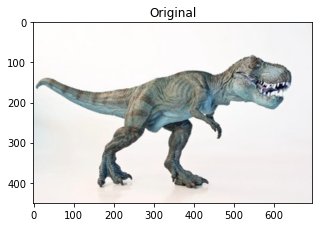

In [19]:
path = "D:/1111111111111111/302843992_485786496928626_6191234182030738228_n.png"
image = cv2.imread(path)
plt.figure( figsize=(5,5))
plt.title('Original')
plt.imshow(image)

In [21]:
rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
cv2.imshow("Rectangle", rectangle)
cv2.waitKey(0)

-1

In [23]:
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
cv2.imshow("Circle", circle)
cv2.waitKey(0)

-1

In [24]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
cv2.imshow("AND", bitwiseAnd)
cv2.waitKey(0)

-1

In [25]:
def Bitwise(image,mask, Type = 'AND'):
    """
    
    """
    matrix_zeros=np.zeros(image.shape, dtype = "uint8")
    if Type.upper() == 'AND':
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                if len(image.shape) == 3:
                    for k in range(image.shape[2]):
                        matrix_zeros[i,j,k] = image[i,j,k] & mask[i,j]
                matrix_zeros[i,j] = image[i,j] & mask[i,j]
    if Type.upper() == 'OR':
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                if len(image.shape) == 3:
                    for k in range(image.shape[2]):
                        matrix_zeros[i,j,k] = image[i,j,k] | mask[i,j]
                matrix_zeros[i,j] = image[i,j] | mask[i,j]
    if Type.upper() == 'XOR':
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                if len(image.shape) == 3:
                    for k in range(image.shape[2]):
                        matrix_zeros[i,j,k] = image[i,j,k] ^ mask[i,j]
                matrix_zeros[i,j] = image[i,j] ^ mask[i,j]
    if Type.upper() == 'NOT':
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                if len(image.shape) == 3:
                    for k in range(image.shape[2]):
                        matrix_zeros[i,j,k] = ~image[i,j,k]
                matrix_zeros[i,j] = ~image[i,j]
    return matrix_zeros
    

In [28]:
AND = Bitwise(rectangle,circle,Type = 'AND')
OR = Bitwise(rectangle,circle,Type = 'OR')
XOR = Bitwise(rectangle,circle,Type = 'XOR')
NOT = Bitwise(rectangle,circle,Type = 'NOT')

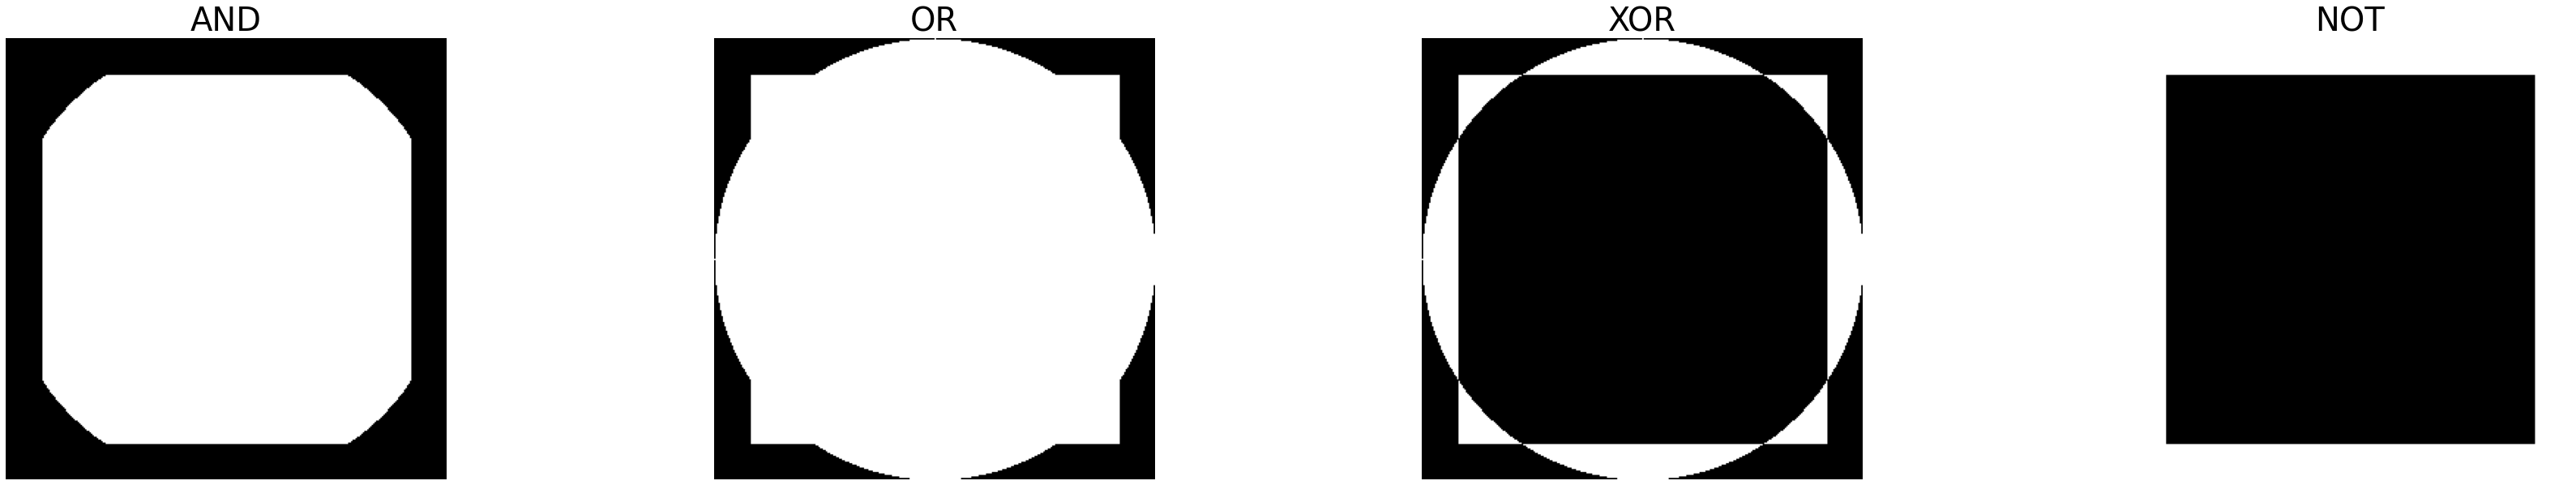

In [29]:
imshows([AND, OR, XOR, NOT], ["AND", "OR", 'XOR', 'NOT'], 1,4)

#### 6.21 Masking

In [11]:
import numpy as np
import argparse
import cv2
import math as mb
import matplotlib.pyplot as plt

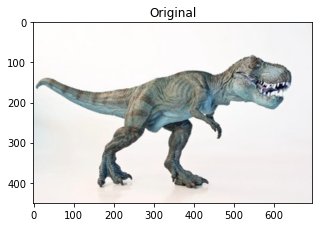

In [12]:
path = "D:/1111111111111111/302843992_485786496928626_6191234182030738228_n.png"
image = cv2.imread(path)
plt.figure( figsize=(5,5))
plt.title('Original')
plt.imshow(image)

In [13]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
cv2.rectangle(mask, (cX - 75, cY - 75), (cX + 75 , cY + 75), 255,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
cv2.circle(mask, (cX,cY),100,300,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#### Arithmetic

In [37]:
import numpy as np
import argparse
import cv2
import math as mb
import matplotlib.pyplot as plt

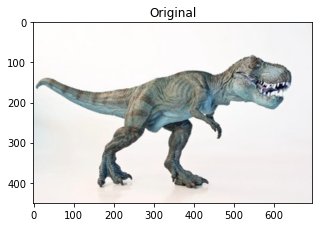

In [38]:
path = "D:/1111111111111111/302843992_485786496928626_6191234182030738228_n.png"
image = cv2.imread(path)
plt.figure( figsize=(5,5))
plt.title('Original')
plt.imshow(image)

In [49]:
M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)
cv2.imshow("Added", added)

In [ ]:
M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)
cv2.imshow("Subtracted", subtracted)
cv2.waitKey(0)


In [46]:
def add_and_subtracted(image,quality,Type = 'ADD'):
    if Type.upper() == 'ADD':
        matrix =np.zeros(image.shape, dtype = "uint8")
        quality=np.zeros(image.shape, dtype = "uint8")
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                if float(image[i,j,0]) - float(quality[i,j,0]) >= 255:
                    matrix[i,j,0] = 255
                else:
                    matrix[i,j,0] = float(image[i,j,0]) - float(quality[i,j,0])
                if float(image[i,j,1]) - float(quality[i,j,1]) >= 255:
                    matrix[i,j,1] = 255
                else:
                    matrix[i,j,1] = float(image[i,j,1]) - float(quality[i,j,1])
                if float(image[i,j,2]) - float(quality[i,j,2]) >= 255:
                    matrix[i,j,2] = 255
                else:
                    matrix[i,j,2] = float(image[i,j,2]) - float(quality[i,j,2])
                matrix[i,j] = image[i,j]
        return matrix
    if Type.upper() == 'SUBTRACTED':
        matrix =np.zeros(image.shape, dtype = "uint8")
        quality=np.zeros(image.shape, dtype = "uint8")
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                if float(image[i,j,0]) - float(quality[i,j,0]) <= 0:
                    matrix[i,j,0]=0
                else:
                    matrix[i,j,0] = float(image[i,j,0]) - float(quality[i,j,0])
                if float(image[i,j,1]) - float(quality[i,j,1]) <= 0:
                    matrix[i,j,1]=0
                else:
                    matrix[i,j,1] = float(image[i,j,1]) - float(quality[i,j,1])
                if float(image[i,j,2]) - float(quality[i,j,2]) <= 0:
                    matrix[i,j,2]=0
                else:
                    matrix[i,j,2]=float(image[i,j,2]) - float(quality[i,j,2])
                matrix[i,j] = image[i,j]
        return  matrix

In [47]:
add_and_subtracted(image,255,Type = 'ADD')

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [237, 238, 242],
        [236, 237, 241],
        [234, 235, 239]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [237, 238, 242],
        [236, 237, 241],
        [235, 236, 240]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [237, 238, 242],
        [236, 237, 241],
        [235, 236, 240]],

       ...,

       [[248, 245, 241],
        [247, 244, 240],
        [246, 243, 239],
        ...,
        [243, 238, 239],
        [248, 243, 244],
        [244, 242, 242]],

       [[248, 245, 241],
        [247, 244, 240],
        [246, 243, 239],
        ...,
        [246, 241, 242],
        [251, 246, 247],
        [253, 251, 251]],

       [[248, 245, 241],
        [247, 244, 240],
        [246, 243, 239],
        ...,
        [250, 245, 246],
        [255, 251, 252],
        [255, 255, 255]]

In [48]:
add_and_subtracted(image,0,Type = "SUBTRACTED")

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [237, 238, 242],
        [236, 237, 241],
        [234, 235, 239]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [237, 238, 242],
        [236, 237, 241],
        [235, 236, 240]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [237, 238, 242],
        [236, 237, 241],
        [235, 236, 240]],

       ...,

       [[248, 245, 241],
        [247, 244, 240],
        [246, 243, 239],
        ...,
        [243, 238, 239],
        [248, 243, 244],
        [244, 242, 242]],

       [[248, 245, 241],
        [247, 244, 240],
        [246, 243, 239],
        ...,
        [246, 241, 242],
        [251, 246, 247],
        [253, 251, 251]],

       [[248, 245, 241],
        [247, 244, 240],
        [246, 243, 239],
        ...,
        [250, 245, 246],
        [255, 251, 252],
        [255, 255, 255]]

#### Colorspace

In [25]:
import numpy as np
import argparse
import cv2
import math as mb
import matplotlib.pyplot as plt

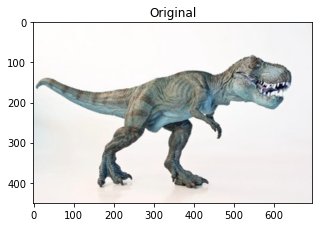

In [26]:
path = "D:/1111111111111111/302843992_485786496928626_6191234182030738228_n.png"
image = cv2.imread(path)
plt.figure( figsize=(5,5))
plt.title('Original')
plt.imshow(image)


In [20]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)

In [17]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV", hsv)

In [ ]:
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
cv2.imshow("L*a*b*", lab)
cv2.waitKey(0)


In [28]:
def rgb_gray(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i][j]=max(image[i][j][0],image[i][j][1],image[i][j][2])
    return image

In [29]:
def rgb_2lab(image):
    lab = np.zeros(image.shape,dtype='float64')
    image = image.astype('float64')
    for i in range (image.shape[0]):
        for j in range(image.shape[1]):
            image[i,j] = image[i,j]/255
            x = image[i,j,0]*0.412453 + image[i,j,1]*0.35758 + image[i,j,2]*0.180423
            y = image[i,j,0]*0.212671 + image[i,j,1]*0.71516 + image[i,j,2]*0.072169
            z = image[i,j,0]*0.019334 + image[i,j,1]*0.119193 + image[i,j,2]*0.950227
            x = x/95.047
            y = y/100
            z = z/108.883
            x = np.where(x>0.0085,x**(1/3),(7.787 *x)+16/116)
            y = np.where(y>0.0085,y**(1/3),(7.787 *y)+16/116)
            z = np.where(z>0.0085,z**(1/3),(7.787 *z)+16/116)
            lab[i,j,0] = ((116*y)-16)/10
            lab[i,j,1] = (500*(x-y))/10
            lab[i,j,2] = (200*(y-z))/5
    return lab

In [32]:
def rgb_hsv(image):
    hsv = np.zeros(image.shape,dtype='uint8')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            r = image[i,j,0]
            g = image[i,j,1]
            b = image[i,j,2]
            cmax = max(r,g,b)
            cmin = min(r,g,b)
            delta = cmax - cmin
            if(delta == 0): # tính màu
                h = 0
            elif(cmax == r):
                h = 60*(((g-b)/delta)%6)
            elif(cmin == g):
                h = 60*(((b-r)/delta)+2)
            elif(cmin == b):
                h = 60*(((r-g)/delta)+4)
            if(cmax == 0): #tính độ bão hòa
                s = 0
            else:
                s = delta/cmax
            v = cmax # tính giá trị
            hsv[i,j,0]=h
            hsv[i,j,1]=s
            hsv[i,j,2]=v
    return hsv

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


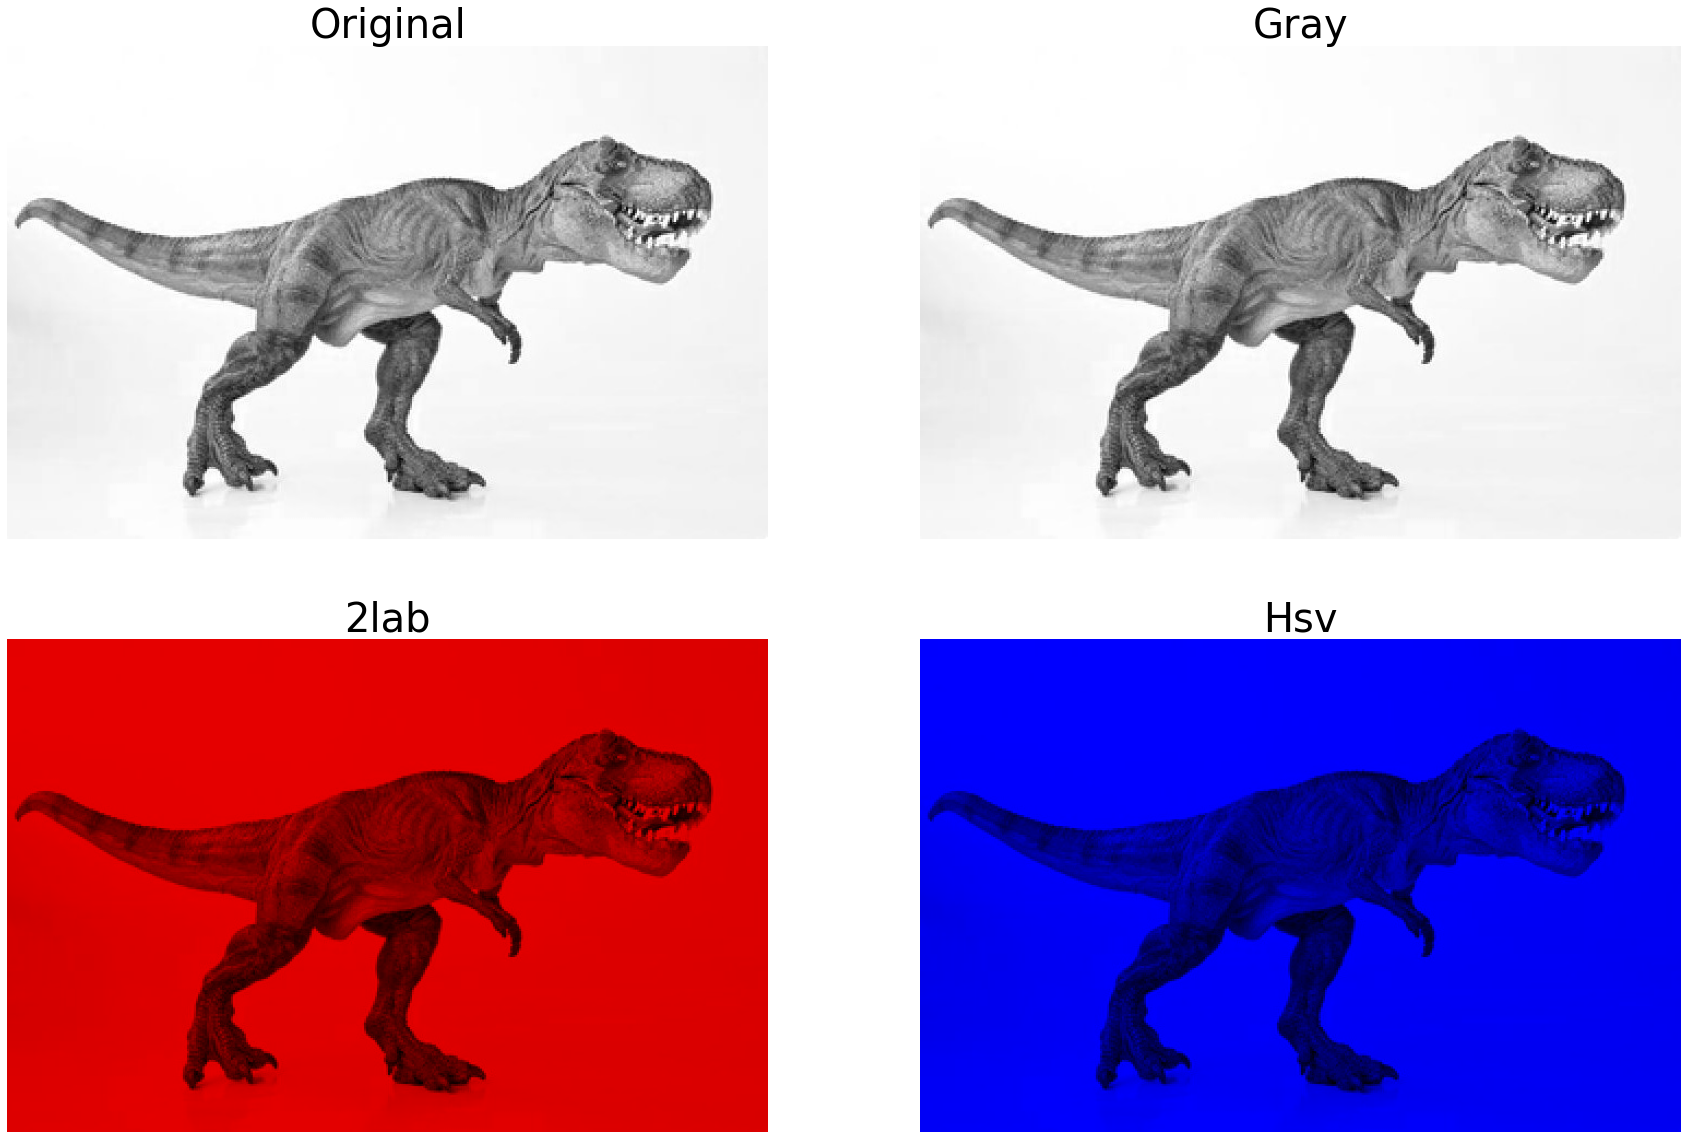

In [33]:
imshows([image,rgb_gray(image), rgb_2lab(image), rgb_hsv(image)], ["Original","Gray", "2lab", "Hsv"], 2,2)